# Análisis de Ddatos
## TP N 1
----
### Grupo N
- Aviani, José
- Díaz, José Luis
- Silvera, Ricardo

---
## Introducción

Para este trabajo elegimos el el dataset Precios Claros – Base SEPA, perteneciente al “Sistema Electrónico de Publicidad de Precios Argentinos (SEPA)" (https://datos.gob.ar/), el cual reúne los precios de comercios minoristas (grandes establecimientos) de más de 70 mil productos en toda la Argentina. Particularmente para este trabajo, seleccionamos el set de datos del establecimiento **Carrefour** ya que era el de mayor tamaño, lo cual es deseable como entrada en un problema de aprendizaje de máquina.
A continuación realizamos el análisis exploratorio de los datos y finalizamos con las conclusiones obtenidas del trabajo.


### Importación de librerías

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Análisis Exploratorio de los Datos

### Carga y comprensión de los datos
Los datos están separados en 3 archivos
- comercio
- sucursales
- productos

Cada uno contiene información específica sobre la entidad que indica su nombre. Vamos a investigar a cada uno para comprender la información que contienen y como está organizada y unificar todos los datos que nos interesen en un único dataframe. 

### Comercio

In [30]:
comercio=pd.read_csv('./dataset/comercio.csv',delimiter='|')
comercio.columns

Index(['id_comercio', 'id_bandera', 'comercio_cuit', 'comercio_razon_social',
       'comercio_bandera_nombre', 'comercio_bandera_url',
       'comercio_ultima_actualizacion', 'comercio_version_sepa'],
      dtype='object')

In [16]:
comercio.head()

,id_comercio,id_bandera,comercio_cuit,comercio_razon_social,comercio_bandera_nombre,comercio_bandera_url,comercio_ultima_actualizacion,comercio_version_sepa
0,10,1.0,3.068731e+10,INC S.A.,Hipermercado Carrefour,www.carrefour.com.ar,2025-07-11T04:30:04-03:00,1.0
1,10,3.0,3.068731e+10,INC S.A.,Express,www.carrefour.com.ar,2025-07-11T04:30:04-03:00,1.0
2,10,2.0,3.068731e+10,INC S.A.,Market,www.carrefour.com.ar,2025-07-11T04:30:04-03:00,1.0
3,Ultima actualización: 2025-07-11T04:30:04-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


El dataframe **comercio** contiene solo 3 filas con información, mucha de la cuales son repetitiva y constante para nuestro caso que solo estudiaremos un solo comercio.

- `id_comercio`: Es el identificador de comercio, como trabajaremos solo con Carefour este data será constante en todo el dataset.

- `id_bandera`: Es de tipo numérico,  identifica el tipo de comercio cuya discreción en texto está en el campo comercio_bandera_nombre 
- `icomercio_cui`: Es de tipo numérico, contiene el numero de CUIT del comercio, constante para nuestro caso. 
- `comercio_razon_social`:  Es de tipo texto, contiene el la Razón Social del comercio, es constante para nuestro caso.
- `comercio_bandera_nombre`: Contiene la descripción del tipo de comercio (Hipermercado Carrefeour, Express, Market). es la descripción del valor numérico del campo id_bandera.
- `comercio_ultima_actualizacion`: Contiene la fecha y hora de la actualización del archivo. Es constante para nuestro caso ya que trabajaremos con un único archivo.
- `comercio_version_sepa`: Es el numero de versión que indica la versión del modelo de datos del paquete SEPA.

### Sucursales

In [ ]:
sucursales=pd.read_csv('./dataset/sucursales.csv',delimiter='|')

In [14]:
sucursales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id_comercio                            564 non-null    object 
 1   id_bandera                             563 non-null    float64
 2   id_sucursal                            563 non-null    float64
 3   sucursales_nombre                      563 non-null    object 
 4   sucursales_tipo                        563 non-null    object 
 5   sucursales_calle                       563 non-null    object 
 6   sucursales_numero                      559 non-null    float64
 7   sucursales_latitud                     563 non-null    float64
 8   sucursales_longitud                    563 non-null    float64
 9   sucursales_observaciones               17 non-null     object 
 10  sucursales_barrio                      302 non-null    object 
 11  sucurs

In [15]:
sucursales.head()

,id_comercio,id_bandera,id_sucursal,sucursales_nombre,sucursales_tipo,sucursales_calle,sucursales_numero,sucursales_latitud,sucursales_longitud,sucursales_observaciones,...,sucursales_codigo_postal,sucursales_localidad,sucursales_provincia,sucursales_lunes_horario_atencion,sucursales_martes_horario_atencion,sucursales_miercoles_horario_atencion,sucursales_jueves_horario_atencion,sucursales_viernes_horario_atencion,sucursales_sabado_horario_atencion,sucursales_domingo_horario_atencion
0,10,3.0,365.0,Nazca 1944,Autoservicio,Nazca,1944.0,-34.612145,-58.480997,NaN,...,1416.0,Ciudad Autónoma de Buenos Aires,AR-C,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,10:30 a 20:00
1,10,3.0,408.0,Perú 916,Autoservicio,Perú,916.0,-34.618745,-58.374322,NaN,...,1068.0,Ciudad Autónoma de Buenos Aires,AR-C,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,11:00 a 20:00
2,10,2.0,144.0,La Plata II,Supermercado,Calle 12,1200.0,-34.923011,-57.949931,NaN,...,1900.0,La Plata,AR-B,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,09:00 a 20:00
3,10,3.0,755.0,C.Tribulato 1279 (San Miguel),Autoservicio,C Tribulato,1279.0,-34.541507,-58.713798,NaN,...,1663.0,San Miguel,AR-B,07:00 A 22:00,07:00 A 22:00,07:00 A 22:00,07:00 A 22:00,07:00 A 22:00,07:00 A 22:00,09:00 A 20:00
4,10,3.0,479.0,Avenida Eva Perón 4215,Autoservicio,Avenida Eva Perón,4215.0,-34.690047,-58.689142,NaN,...,1722.0,Merlo,AR-B,07:30 a 20:00,07:30 a 20:00,07:30 a 20:00,07:30 a 20:00,07:30 a 20:00,07:30 a 20:00,10:00 a 19:00


El archivo contiene información sobre las 563 sucursales del comercio

#### Identificadores

- `id_bandera`: Tipo de comercio, se relaciona con el campo de mismo nombre del archivo comercio

- `id_sucursal`: Es de tipo numérico, es el identificador de la sucursal

- `sucursales_nombre`: es de tipo texto, contine el noombre de la uscursal

- `sucursales_tipo`: Es de tipo texto, indica el tipo de establecimiento (por ejemplo, Autoservicio, Sueprmercado).

#### Ubicación
- `sucursales_calle`: Es de tipo texto, representa el nombre de la calle donde está ubicada la sucursal.
- `sucursales_numero`: Es de tipo numérico o texto, indica el número de la dirección de la sucursal.
- `sucursales_latitud`: Es de tipo numérico, representa la coordenada de latitud de la ubicación geográfica de la sucursal.
- `sucursales_longitud`: Es de tipo numérico, representa la coordenada de longitud de la ubicación geográfica de la sucursal.
- `sucursales_observaciones`: Es de tipo texto, contiene observaciones o notas adicionales sobre la sucursal.
- `sucursales_codigo_postal`: Es de tipo texto o numérico, representa el código postal correspondiente a la dirección de la sucursal.
- `sucursales_localidad`: Es de tipo texto, indica la localidad o ciudad donde se encuentra la sucursal.
- `sucursales_barrio`: Es de tipo texto, indica el barrio donde se encuentra ubicada la sucursal.
- `sucursales_provincia`: Es de tipo texto, contine un código que indica la provincia a la que pertenece la sucursal.

#### Horarios de atención
- `sucursales_lunes_horario_atencion`: Es de tipo texto, indica el horario de atención al público durante los días lunes.
- `sucursales_martes_horario_atencion`: Es de tipo texto, indica el horario de atención al público durante los días martes.
- `sucursales_miercoles_horario_atencion`: Es de tipo texto, indica el horario de atención al público durante los días miércoles.
- `sucursales_jueves_horario_atencion`: Es de tipo texto, indica el horario de atención al público durante los días jueves.
- `sucursales_viernes_horario_atencion`: Es de tipo texto, indica el horario de atención al público durante los días viernes.
- `sucursales_sabado_horario_atencion`: Es de tipo texto, indica el horario de atención al público durante los días sábados.
- `sucursales_domingo_horario_atencion`: Es de tipo texto, indica el horario de atención al público durante los días domingos.

Vamos a considerar todos los campos de este archivo

### Productos

In [20]:
productos=pd.read_csv('./dataset/productos.csv',delimiter='|',low_memory=False)

In [21]:
productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2835685 entries, 0 to 2835684
Data columns (total 17 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   id_comercio                           object 
 1   id_bandera                            float64
 2   id_sucursal                           float64
 3   id_producto                           float64
 4   productos_ean                         float64
 5   productos_descripcion                 object 
 6   productos_cantidad_presentacion       float64
 7   productos_unidad_medida_presentacion  object 
 8   productos_marca                       object 
 9   productos_precio_lista                float64
 10  productos_precio_referencia           float64
 11  productos_cantidad_referencia         float64
 12  productos_unidad_medida_referencia    object 
 13  productos_precio_unitario_promo1      float64
 14  productos_leyenda_promo1              object 
 15  productos_preci

In [22]:
productos.head()

,id_comercio,id_bandera,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2
0,10,1.0,63.0,7.790771e+12,1.0,TOALLA NOSOTRAS CLASICAS C CALENDULA X 16U,1.0,UNI,NOSOTRAS,2819.0,176.19,16.0,UNI,NaN,NaN,NaN,NaN
1,10,3.0,711.0,7.790070e+12,1.0,FIDEOS DEDALITOS LUCCHETTI BOLSA X 500 GRS,1.0,UNI,LUCCHETTI,1439.0,2878.00,500.0,GRM,NaN,NaN,NaN,NaN
2,10,1.0,44.0,7.622202e+12,1.0,GALLETITAS BOCA DE DAMA TERRABUSI X 170 GRS,1.0,UNI,TERRABUSI,1059.0,6229.41,170.0,GRM,NaN,NaN,NaN,NaN
3,10,2.0,62.0,7.791293e+12,1.0,ACONDICIONADOR LISO EFECTO BOTOX TRESEMME X 25...,1.0,UNI,TRESEMME,4455.0,17820.00,250.0,CM3,NaN,NaN,NaN,NaN
4,10,3.0,735.0,7.798160e+12,1.0,DURAZNOS EN MITADES CARREFOUR LATA X 820 GRS,1.0,UNI,CARREFOUR,2490.0,3036.59,820.0,GRM,NaN,NaN,NaN,NaN


El archivo contiene 2.835.685 filas con información de los productos.

#### Itentificadores

-  `id_comercio ` : Es de tipo numérico, representa el identificador único del comercio al que pertenece el producto. Es constante para nuestro caso.

-  `id_bandera `: Se refiere al tipo de comercio, y está relacionado con el campo  `id_bandera ` del archivo de comercio.
-  `id_sucursal `: Es de tipo numérico, contiene el código de la sucursal específica dentro del comercio, se relaciona con el campo de mismo nommbre del archivo sucursales.
-  `id_producto `: Es de tipo numérico, es el identificador único del producto para el comercio.
-  `productos_ean `: Es de tipo numérico, representa el código EAN (European Article Number) del producto, utilizado como código de barras.
-  `productos_descripcion `: Es de tipo texto, contiene la descripción comercial del producto.
-  `productos_marca`: Es de tipo texto, indica el nombre de la marca comercial del producto.

#### Unidades de medida y cantidades

-  `productos_cantidad_presentacion `: Es de tipo numérico, indica la cantidad del producto contenida en la unidad.

-  `productos_unidad_medida_presentacion `: Es de tipo texto, representa la unidad de medida de la presentación del producto.
-  `productos_cantidad_referencia `: Es de tipo numérico, indica la cantidad de producto usada como base para calcular el precio de referencia.
-  `productos_unidad_medida_referencia `: Es de tipo texto, representa la unidad de medida de la cantidad de referencia.

#### Precios 
-  `productos_precio_lista` : Es de tipo numérico, representa el precio de lista del producto, es decir, el precio regular sin promociones.

-  `productos_precio_referencia `: Es de tipo numérico, corresponde al precio de referencia.

#### Promociones

-  `productos_precio_unitario_promo1 `: Es de tipo numérico, indica el precio unitario del producto en la primera promoción (si existe).

-  `productos_leyenda_promo1 `: Es de tipo texto, contiene la leyenda o descripción asociada a la primera promoción.
-  `productos_precio_unitario_promo2 `: Es de tipo numérico, indica el precio unitario del producto en la segunda promoción (si existe).
-  `productos_leyenda_promo2 `: Es de tipo texto, contiene la leyenda o descripción asociada a la segunda promoción.

In [31]:
#Se elimina la columna id_comercio
productos.drop(columns='id_comercio')

,id_bandera,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2
0,1.0,63.0,7.790771e+12,1.0,TOALLA NOSOTRAS CLASICAS C CALENDULA X 16U,1.0,UNI,NOSOTRAS,2819.0,176.19,16.0,UNI,NaN,NaN,NaN,NaN
1,3.0,711.0,7.790070e+12,1.0,FIDEOS DEDALITOS LUCCHETTI BOLSA X 500 GRS,1.0,UNI,LUCCHETTI,1439.0,2878.00,500.0,GRM,NaN,NaN,NaN,NaN
2,1.0,44.0,7.622202e+12,1.0,GALLETITAS BOCA DE DAMA TERRABUSI X 170 GRS,1.0,UNI,TERRABUSI,1059.0,6229.41,170.0,GRM,NaN,NaN,NaN,NaN
3,2.0,62.0,7.791293e+12,1.0,ACONDICIONADOR LISO EFECTO BOTOX TRESEMME X 25...,1.0,UNI,TRESEMME,4455.0,17820.00,250.0,CM3,NaN,NaN,NaN,NaN
4,3.0,735.0,7.798160e+12,1.0,DURAZNOS EN MITADES CARREFOUR LATA X 820 GRS,1.0,UNI,CARREFOUR,2490.0,3036.59,820.0,GRM,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835680,3.0,796.0,7.791720e+12,1.0,TE EN SAQUITOS S TACC CARREFOUR X 50 UNI,1.0,UNI,CARREFOUR,1050.0,10500.00,100.0,GRM,NaN,NaN,NaN,NaN
2835681,3.0,762.0,7.791720e+12,1.0,BIZCOCHOS AZUCARADOS CARREFOUR CLASSIC X 200 GRS,1.0,UNI,CARREFOUR CLASSIC,999.0,4995.00,200.0,GRM,NaN,NaN,NaN,NaN
2835682,2.0,195.0,7.790896e+12,1.0,JUGO BASE SOJA FRUTAS TROPICAL ADES X 1 LT,1.0,UNI,ADES,2300.0,2300.00,1000.0,CM3,NaN,NaN,NaN,NaN
2835683,3.0,574.0,7.798291e+12,1.0,JUGO MULTIFRUTA TUTTI TETRA X 1 LT,1.0,UNI,TUTTI,1419.0,1419.00,1000.0,CM3,NaN,NaN,NaN,NaN


Descartamos los datos del dataframe **comercio** ya que sus datos son constantes, excepto `id_bandera` y `comercio_bandera_nombre` que no son redundantes para nuestro estudio, ya que contamos con el campo `id_bandera` en el archivo sucursales.
Unimos el dataframe de **productos** y **sucursales** para dejarlos en un solo objeto y poder analizar toda la información junta.

In [23]:
datos= pd.merge(productos,sucursales,on='id_sucursal')
datos.head()

,id_comercio_x,id_bandera_x,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,...,sucursales_codigo_postal,sucursales_localidad,sucursales_provincia,sucursales_lunes_horario_atencion,sucursales_martes_horario_atencion,sucursales_miercoles_horario_atencion,sucursales_jueves_horario_atencion,sucursales_viernes_horario_atencion,sucursales_sabado_horario_atencion,sucursales_domingo_horario_atencion
0,10,1.0,63.0,7.790771e+12,1.0,TOALLA NOSOTRAS CLASICAS C CALENDULA X 16U,1.0,UNI,NOSOTRAS,2819.0,...,9011.0,Santa Cruz,AR-Z,09:00 a 20:00,09:00 a 20:00,09:00 a 20:00,09:00 a 20:00,09:00 a 20:00,09:00 a 20:00,09:00 a 20:00
1,10,3.0,711.0,7.790070e+12,1.0,FIDEOS DEDALITOS LUCCHETTI BOLSA X 500 GRS,1.0,UNI,LUCCHETTI,1439.0,...,1427.0,Ciudad Autónoma de Buenos Aires,AR-C,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,11:00 a 20:00
2,10,1.0,44.0,7.622202e+12,1.0,GALLETITAS BOCA DE DAMA TERRABUSI X 170 GRS,1.0,UNI,TERRABUSI,1059.0,...,3500.0,Resistencia,AR-H,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,09:00 a 20:00
3,10,2.0,62.0,7.791293e+12,1.0,ACONDICIONADOR LISO EFECTO BOTOX TRESEMME X 25...,1.0,UNI,TRESEMME,4455.0,...,1629.0,Pilar,AR-B,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00
4,10,3.0,735.0,7.798160e+12,1.0,DURAZNOS EN MITADES CARREFOUR LATA X 820 GRS,1.0,UNI,CARREFOUR,2490.0,...,1428.0,Ciudad Autónoma de Buenos Aires,AR-C,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,11:00 a 20:00


### Resumen estadístico general



In [24]:
datos.describe()

,id_bandera_x,id_sucursal,id_producto,productos_ean,productos_cantidad_presentacion,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_precio_unitario_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2,id_bandera_y,sucursales_numero,sucursales_latitud,sucursales_longitud,sucursales_codigo_postal
count,2.835684e+06,2.835684e+06,2.835684e+06,2.835684e+06,2835684.0,2.835684e+06,2.835684e+06,2.835684e+06,1.262380e+05,0.0,0.0,2.835684e+06,2.785226e+06,2.835684e+06,2.835684e+06,2.835684e+06
mean,1.929718e+00,2.868911e+02,7.185306e+12,9.805973e-01,1.0,1.378489e+04,2.498746e+04,3.362810e+02,9.217315e+04,NaN,NaN,1.929718e+00,2.360849e+03,-3.461375e+01,-6.017421e+01,2.801540e+03
std,8.898737e-01,2.326071e+02,1.847282e+12,1.379357e-01,0.0,7.999113e+04,1.886987e+05,4.952497e+02,2.273990e+05,NaN,NaN,8.898737e-01,2.865328e+03,3.834572e+00,3.221620e+00,2.260421e+03
min,1.000000e+00,1.000000e+00,1.736403e+06,0.000000e+00,1.0,2.800000e-01,1.600000e-01,0.000000e+00,1.900000e+01,NaN,NaN,1.000000e+00,0.000000e+00,-5.481534e+01,-7.129679e+01,1.002000e+03
25%,1.000000e+00,6.200000e+01,7.790250e+12,1.000000e+00,1.0,1.809000e+03,3.675000e+03,7.000000e+00,3.226875e+03,NaN,NaN,1.000000e+00,6.310000e+02,-3.463902e+01,-6.051124e+01,1.425000e+03
50%,2.000000e+00,2.310000e+02,7.791720e+12,1.000000e+00,1.0,3.275000e+03,8.622220e+03,1.750000e+02,1.190000e+04,NaN,NaN,2.000000e+00,1.597000e+03,-3.459014e+01,-5.851654e+01,1.663000e+03
75%,3.000000e+00,4.650000e+02,7.797197e+12,1.000000e+00,1.0,6.790000e+03,1.853846e+04,5.000000e+02,5.000000e+04,NaN,NaN,3.000000e+00,3.117000e+03,-3.444981e+01,-5.842162e+01,3.400000e+03
max,3.000000e+00,8.100000e+02,9.873463e+12,1.000000e+00,1.0,7.349000e+06,3.328889e+07,8.000000e+03,3.509000e+06,NaN,NaN,3.000000e+00,2.569400e+04,-2.477965e+01,-5.754772e+01,9.420000e+03


### Revisión de valores faltantes 



### Análisis de tipos de variables



### Distribuciones
Histogramas de variables numéricas

Gráficos de barras para variables categóricas

Boxplots para detectar outliers

<Axes: xlabel='productos_precio_lista'>

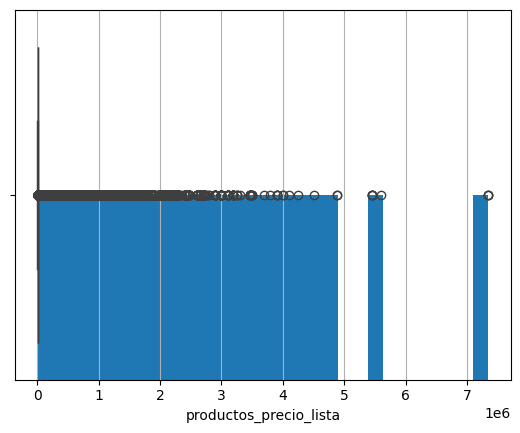

In [28]:
datos['productos_precio_lista'].hist(bins=30)
sns.boxplot(x=datos['productos_precio_lista'])

### Relación entre variables
Matriz de correlación (df.corr())

Gráficos de dispersión (sns.scatterplot())

Agrupaciones y comparaciones por categorías (groupby())

### Detección de outliers 

### Segmentación y agrupamientos

---
## Conclusiones